<a href="https://colab.research.google.com/github/Sigerip/curso-data-viz/blob/main/Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Introdução ao Seaborn

## 4.1 Visualização com Seaborn

Seaborn é uma biblioteca de visualização de dados baseada no Matplotlib que foi desenvolvida por Michael Waskom. Ela foi projetada especificamente para visualização de dados estatísticos e oferece:

- Interface de alto nível para criar gráficos complexos com poucas linhas de código

- Temas e paletas de cores atraentes por padrão
    
- Integração perfeita com estruturas de dados do Pandas

- Funções específicas para visualizar relações entre variáveis
    
- Suporte para visualização de modelos estatísticos

In [6]:
# Importar bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Verificar a versão do Seaborn
print(f"Versão do Seaborn: {sns.__version__}")

Versão do Seaborn: 0.13.2


## 4.2 Estilos e Temas do Seaborn

Uma das vantagens do Seaborn é a melhoria estética imediata que ele traz para as visualizações.

Estilos de Plot:

- **darkgrid**: Grade escura com fundo branco
- **whitegrid**: Grade clara com fundo branco
- **dark**: Fundo escuro sem grade
- **white**: Fundo branco sem grade
- **ticks**: Apenas com marcadores de eixo

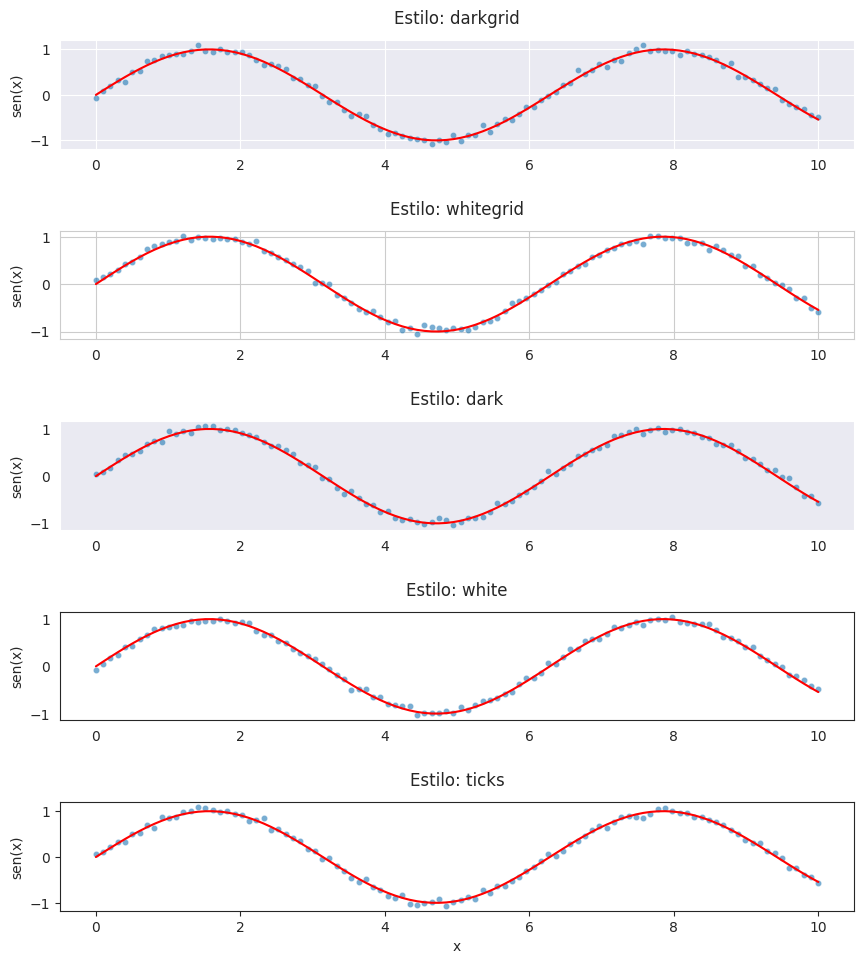

In [7]:
# Demonstração dos estilos do Seaborn
styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']

# Cria figura com proporções
fig = plt.figure(figsize=(9, 10))

for i, style in enumerate(styles, 1):
    with sns.axes_style(style):  # Aplica o estilo ANTES de criar o subplot
        ax = fig.add_subplot(len(styles), 1, i)
        x = np.linspace(0, 10, 100)
        y = np.sin(x) + np.random.normal(0, 0.05, 100)  # Adiciona ruído para visualização

        # Plot com elementos estilizados
        sns.scatterplot(x=x, y=y, s=20, alpha=0.6, ax=ax)
        sns.lineplot(x=x, y=np.sin(x), color='red', linewidth=1.5, ax=ax)

        # Títulos e labels
        ax.set_title(f"Estilo: {style}", fontsize=12, pad=12)
        if i == len(styles):
            ax.set_xlabel("x", fontsize=10)
        else:
            ax.set_xlabel("")
        ax.set_ylabel("sen(x)", fontsize=10)

plt.tight_layout(pad=2.0)  # Aumenta o espaçamento entre subplots
plt.show() # Exibe o gráfico

Contextos de Escala

Estes contextos controlam o tamanho dos elementos do gráfico:

- **paper**: Menor escala, ideal para documentos acadêmicos
- **notebook**: Tamanho médio, bom para notebooks Jupyter
- **talk**: Escala maior, ótimo para apresentações
- **poster**: Maior escala, ideal para pôsteres

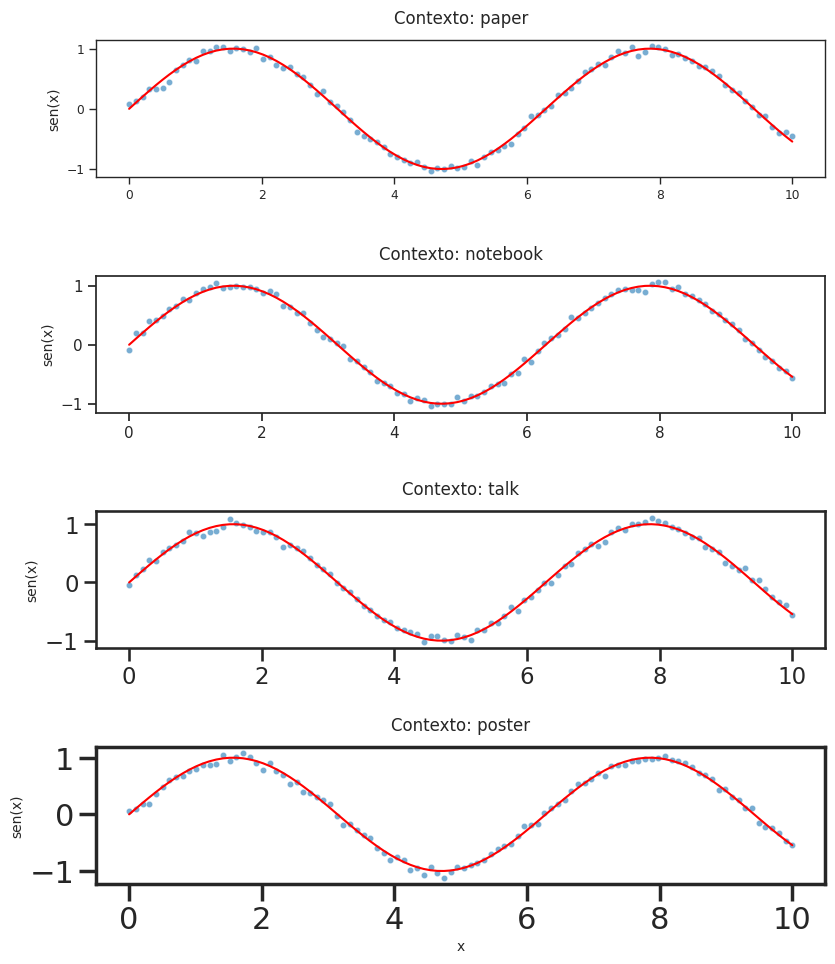

In [9]:
# Demonstração dos contextos do Seaborn
contexts = ['paper', 'notebook', 'talk', 'poster']

# Cria figura com proporções
fig = plt.figure(figsize=(9, 10))

for i, context in enumerate(contexts, 1):
    with sns.plotting_context(context):  # Aplica o contexto ANTES de criar o subplot
        ax = fig.add_subplot(len(contexts), 1, i)
        x = np.linspace(0, 10, 100)
        y = np.sin(x) + np.random.normal(0, 0.05, 100)  # Adiciona ruído para visualização

        # Plot com elementos estilizados
        sns.scatterplot(x=x, y=y, s=20, alpha=0.6, ax=ax)
        sns.lineplot(x=x, y=np.sin(x), color='red', linewidth=1.5, ax=ax)

        # Títulos e labels
        ax.set_title(f"Contexto: {context}", fontsize=12, pad=12)
        if i == len(contexts):
            ax.set_xlabel("x", fontsize=10)
        else:
            ax.set_xlabel("")
        ax.set_ylabel("sen(x)", fontsize=10)

plt.tight_layout(pad=2.0)  # Aumenta o espaçamento entre subplots
plt.show() # Exibe o gráfico

Cores Padrão

O Seaborn vem com uma paleta padrão de 10 cores:

- **Azul** (#1f77b4)
- **Laranja** (#ff7f0e)
- **Verde** (#2ca02c)
- **Vermelho** (#d62728)
- **Roxo** (#9467bd)
- **Marrom** (#8c564b)
- **Rosa** (#e377c2)
- **Cinza** (#7f7f7f)
- **Verde-amarelado** (#bcbd22)
- **Azul claro** (#17becf)



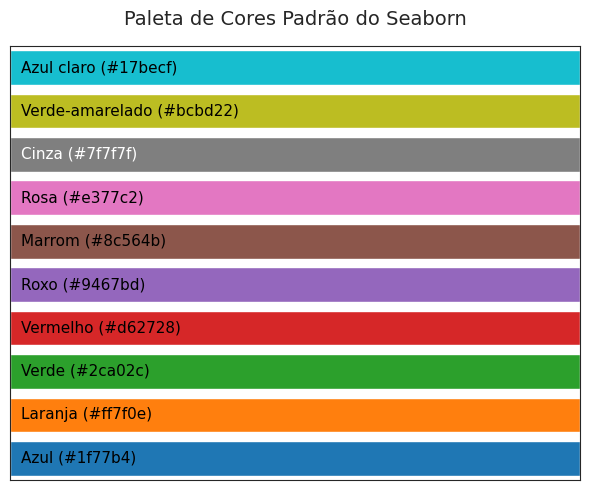

In [10]:
# Lista de cores e nomes
cores = [
    ("Azul", "#1f77b4"),
    ("Laranja", "#ff7f0e"),
    ("Verde", "#2ca02c"),
    ("Vermelho", "#d62728"),
    ("Roxo", "#9467bd"),
    ("Marrom", "#8c564b"),
    ("Rosa", "#e377c2"),
    ("Cinza", "#7f7f7f"),
    ("Verde-amarelado", "#bcbd22"),
    ("Azul claro", "#17becf"),
]

fig, ax = plt.subplots(figsize=(6, 5))

# Desenha um retângulo colorido para cada cor
for i, (nome, cor) in enumerate(cores):
    ax.barh(i, 1, color=cor)
    ax.text(0.02, i, f"{nome} ({cor})", va='center', ha='left', fontsize=11, color='black' if i != 7 else 'white')

ax.set_xlim(0, 1)
ax.set_ylim(-0.5, len(cores) - 0.5)
ax.set_yticks([])
ax.set_xticks([])
ax.set_title("Paleta de Cores Padrão do Seaborn", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

Além disso, o Seaborn também oferece várias outras paletas de cores predefinidas e a possibilidade de criar paletas personalizadas usando ```sns.color_palette()```.

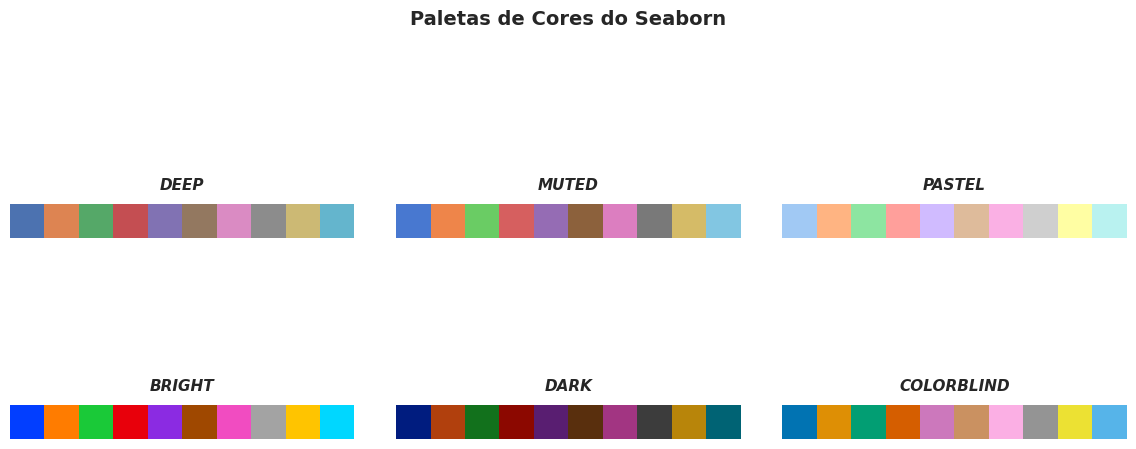

In [8]:
# Paletas de cores
plt.figure(figsize=(12, 6))
paletas = ['deep', 'muted', 'pastel', 'bright', 'dark', 'colorblind']

for i, palette in enumerate(paletas, 1):
    ax = plt.subplot(2, 3, i)

    # Cria uma matriz de índices para representar as cores
    cores = sns.color_palette(palette, n_colors=10)
    gradiente = np.arange(10).reshape(1, -1)  # Matriz 1x10 de índices

    # Plot usando os índices com a paleta como cmap
    sns.heatmap(
        gradiente,
        cmap=sns.color_palette(palette, as_cmap=True),
        ax=ax,
        cbar=False,
        square=True,
        xticklabels=False,
        yticklabels=False
    )

    # Estilização
    ax.set_title(palette.upper(), fontsize=11, pad=10, fontweight='bold', style='italic')
    ax.set_facecolor('white')  # Fundo branco para contraste

plt.tight_layout(pad=3.0)
plt.suptitle("Paletas de Cores do Seaborn", y=1.02, fontsize=14, fontweight='bold')
plt.show()

## 4.3 Tipos de Gráficos no Seaborn

Seaborn oferece uma variedade de funções para criar diferentes tipos de gráficos. Vamos explorar os principais:

### 4.3.1 Gráficos de Distribuição

Esses gráficos são usados para visualizar a distribuição de uma única variável ou a relação entre várias variáveis.

- ```sns.histplot()```: Cria histogramas, que mostram a frequência de ocorrência de diferentes valores em um conjunto de dados.
- ```sns.kdeplot()```: Cria gráficos de densidade kernel (KDE), que estimam a função de densidade de probabilidade de uma variável contínua.
- ```sns.displot()```: Uma função mais geral que combina histogramas e KDEs, permitindo criar gráficos de distribuição mais complexos.
- ```sns.rugplot()```: Adiciona pequenas linhas (rugs) ao longo do eixo x para mostrar a localização exata de cada observação.
- ```sns.ecdfplot()```: Cria um gráfico ECDF (Empirical Cumulative Distribution Function) que mostra a proporção de observações em um conjunto de dados que são menores ou iguais a um determinado valor. Ele é usado para visualizar a distribuição cumulativa de uma única variável.

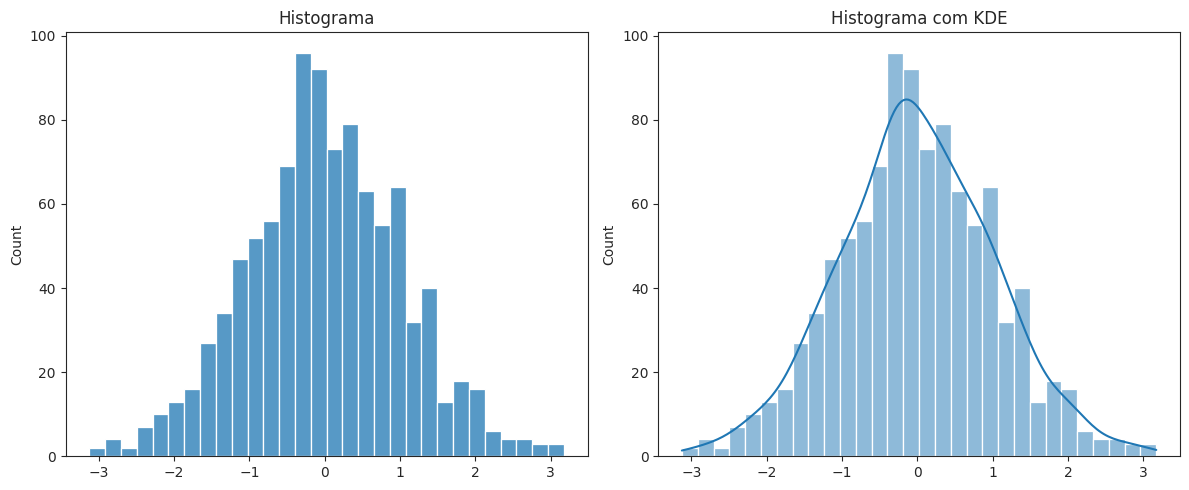

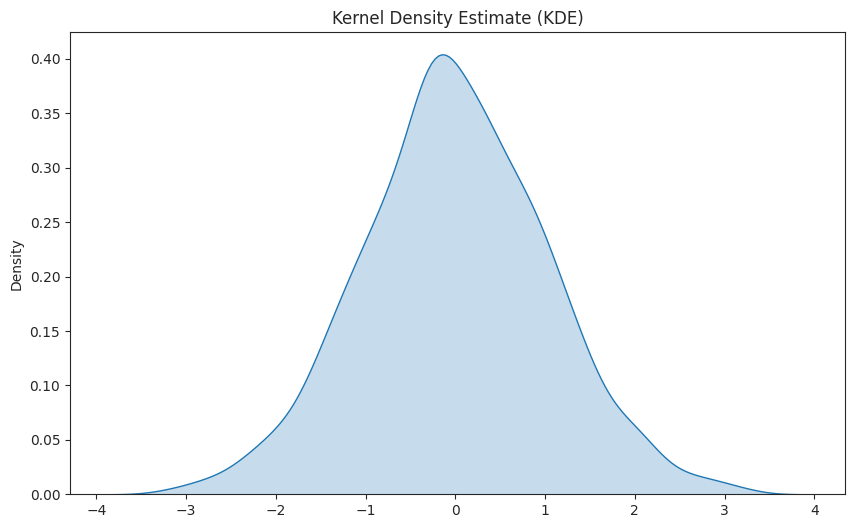

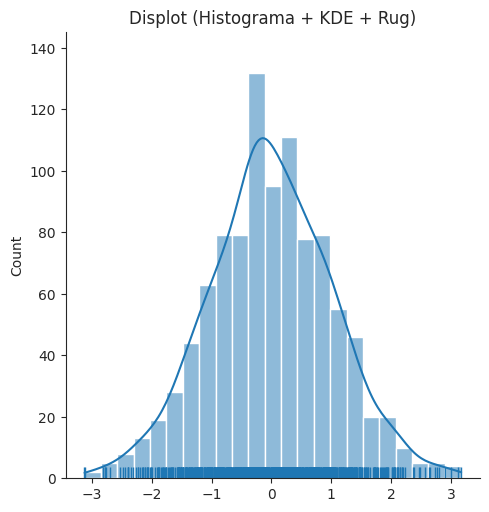

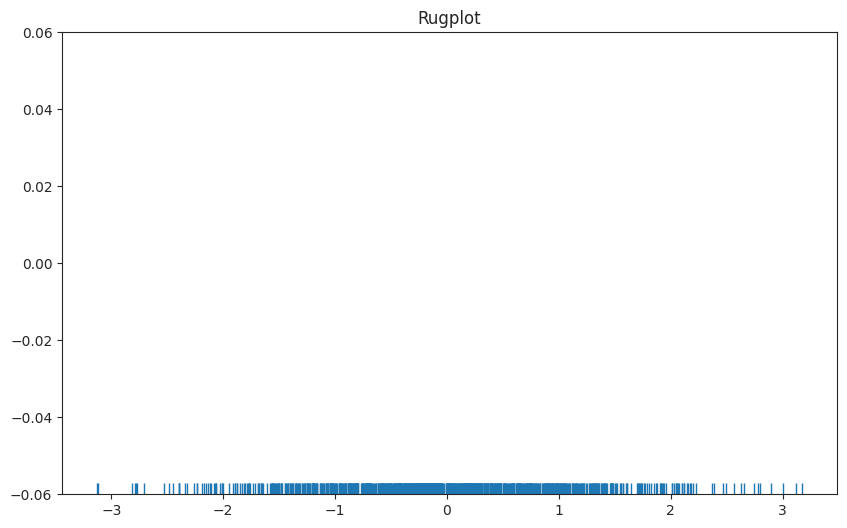

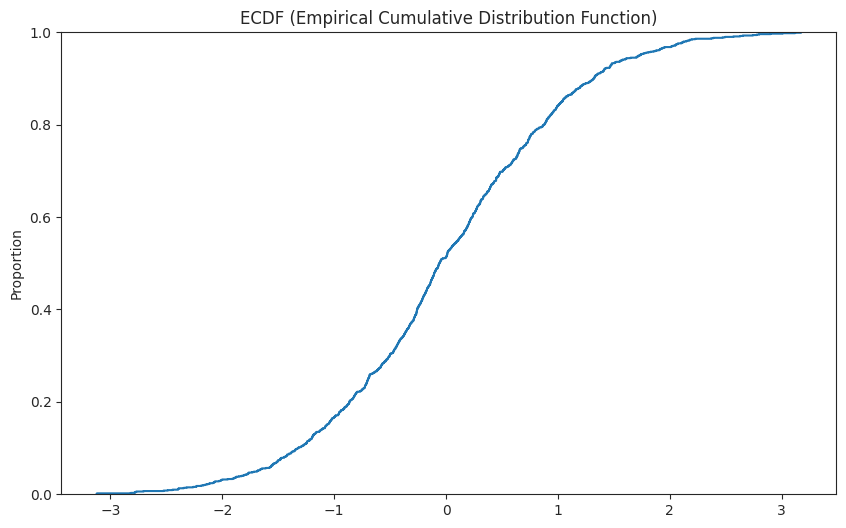

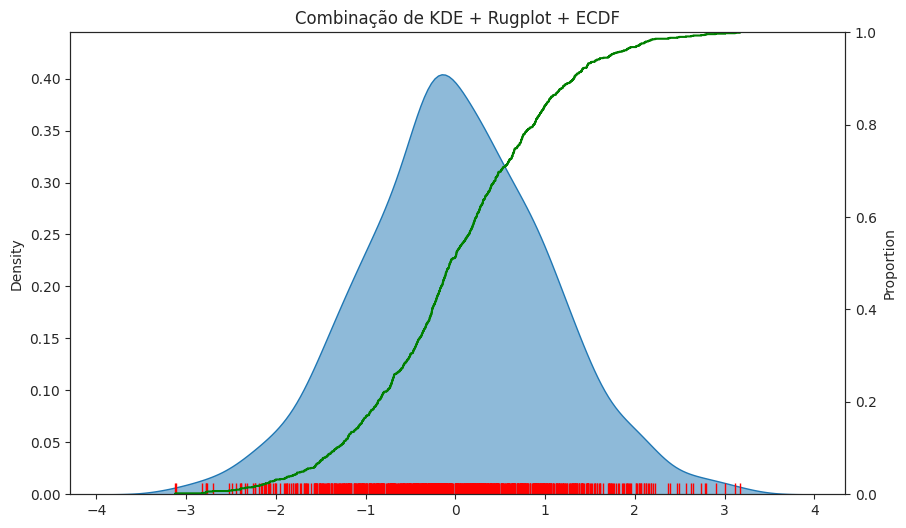

In [11]:
# Gerar dados aleatórios com distribuição normal
data = np.random.normal(0, 1, 1000)

# Figura 1: Histogramas (com e sem KDE)
plt.figure(figsize=(12, 5))

# Subplot 1: Histograma simples
plt.subplot(1, 2, 1)
sns.histplot(data, kde=False, bins=30)  # kde=False remove a linha de densidade
plt.title('Histograma')

# Subplot 2: Histograma com KDE
plt.subplot(1, 2, 2)
sns.histplot(data, kde=True, bins=30)  # kde=True adiciona a linha de densidade
plt.title('Histograma com KDE')

plt.tight_layout()
plt.show()

# Figura 2: Apenas KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(data, fill=True)  # fill=True preenche a área sob a curva
plt.title('Kernel Density Estimate (KDE)')
plt.show()

# Figura 3: Displot (função mais flexível para distribuições)
sns.displot(
    data=data,
    kind="hist",  # pode ser "kde", "ecdf" ou "hist"
    kde=True,     # adiciona linha KDE ao histograma
    rug=True      # adiciona rugplot
)
plt.title('Displot (Histograma + KDE + Rug)')
plt.show()

# Figura 4: Rugplot
plt.figure(figsize=(10, 6))
sns.rugplot(data)  # adiciona marcas no eixo x para cada observação
plt.title('Rugplot')
plt.show()

# Figura 5: ECDF (Empirical Cumulative Distribution Function)
plt.figure(figsize=(10, 6))
sns.ecdfplot(data)  # mostra a distribuição cumulativa
plt.title('ECDF (Empirical Cumulative Distribution Function)')
plt.show()

# Figura 6: Combinação de diferentes visualizações
plt.figure(figsize=(10, 6))
# Plotar KDE
sns.kdeplot(data, fill=True, alpha=0.5, label='KDE')
# Adicionar rugplot
sns.rugplot(data, color='red', label='Rugplot')
# Adicionar ECDF (eixo y secundário)
ax2 = plt.twinx()
sns.ecdfplot(data, ax=ax2, color='green', label='ECDF')
plt.title('Combinação de KDE + Rugplot + ECDF')
plt.show()

### 4.3.2 Gráficos de Relação

Esses gráficos são usados para visualizar a relação entre duas ou mais variáveis.

- ```sns.scatterplot()```: Cria gráficos de dispersão, que mostram a relação entre duas variáveis como pontos em um plano cartesiano.
- ```sns.lineplot()```: Cria gráficos de linha, que mostram a relação entre duas variáveis como uma linha conectando os pontos de dados.
- ```sns.relplot()```: Uma função mais geral que combina gráficos de dispersão e linha, permitindo criar gráficos de relação mais complexos.

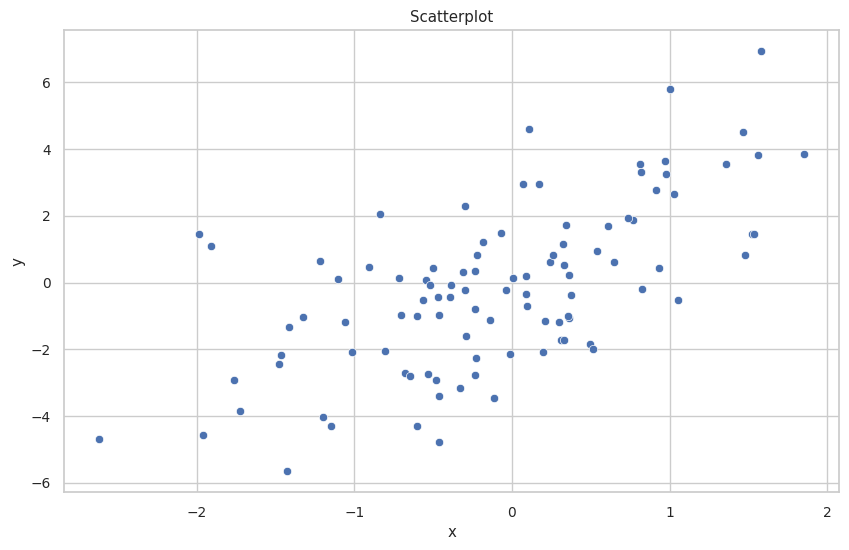

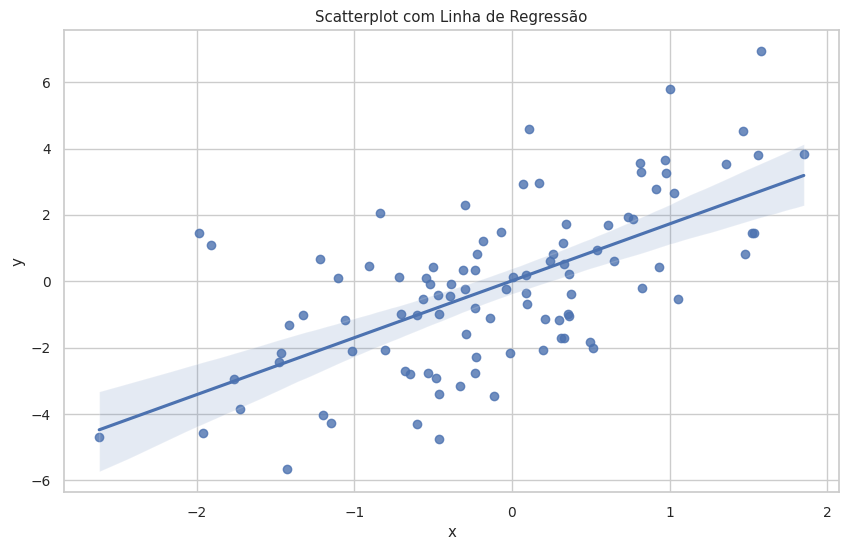

In [ ]:
# Gerar dados
np.random.seed(42)
n = 100
x = np.random.normal(0, 1, n)
y = x * 2 + np.random.normal(0, 2, n)
df = pd.DataFrame({'x': x, 'y': y})

# Scatterplot simples
plt.figure(figsize=(10, 6))
sns.scatterplot(x='x', y='y', data=df)
plt.title('Scatterplot')
plt.show()

# Scatterplot com regressão
plt.figure(figsize=(10, 6))
sns.regplot(x='x', y='y', data=df)
plt.title('Scatterplot com Linha de Regressão')
plt.show()

Pairplot

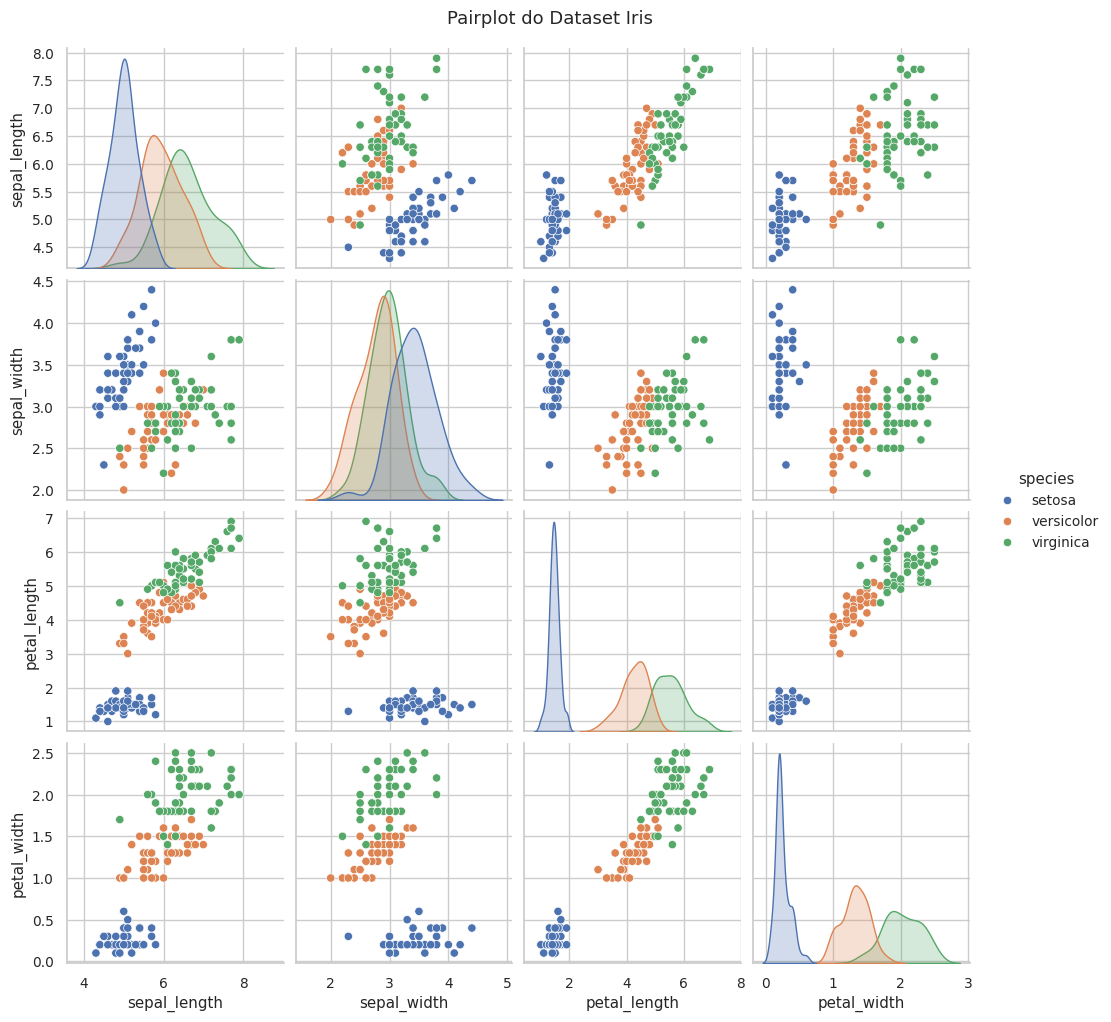

In [ ]:
# Usar o dataset iris
iris = sns.load_dataset('iris')

# Pairplot
sns.pairplot(iris, hue='species', height=2.5)
plt.suptitle('Pairplot do Dataset Iris', y=1.02)
plt.show()

Heatmap

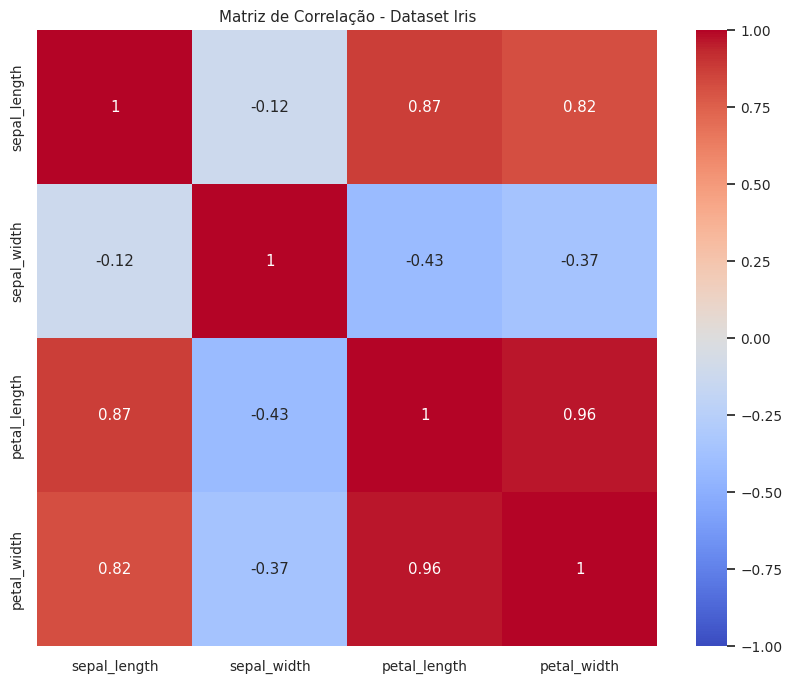

In [ ]:
# Matriz de correlação
corr = iris.drop('species', axis=1).corr()

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Dataset Iris')
plt.show()

### 4.3.3 Gráficos Categóricos

Esses gráficos são usados para visualizar a relação entre uma variável categórica e uma ou mais variáveis numéricas.

- ```sns.barplot()```: Cria gráficos de barras, que mostram a média de uma variável numérica para cada categoria.
- ```sns.countplot()```: Cria gráficos de contagem, que mostram o número de ocorrências de cada categoria.
- ```sns.boxplot()```: Cria diagramas de caixa, que mostram a distribuição de uma variável numérica para cada categoria, incluindo a mediana, os quartis e os outliers.
- ```sns.violinplot()```: Cria gráficos de violino, que combinam diagramas de caixa e KDEs para mostrar a distribuição de uma variável numérica para cada categoria.
- ```sns.stripplot()```: Cria gráficos de dispersão, que mostram a distribuição de uma variável numérica para cada categoria, com os pontos de dados espalhados ao longo do eixo x.
- ```sns.swarmplot()```: Similar ao stripplot(), mas com os pontos de dados ajustados para evitar sobreposição.
- ```sns.catplot()```: Uma função mais geral que combina todos os gráficos categóricos, permitindo criar gráficos mais complexos.
- ```sns.pointplot()```: Cria um gráfico para mostrar a relação entre uma variável categórica e uma variável numérica. Ele exibe a média da variável numérica para cada categoria, com intervalos de confiança ao redor dessas médias. Ele é especialmente útil para comparar a média de uma variável entre diferentes categorias.

In [14]:
# Dados de exemplo
titanic = sns.load_dataset('titanic')

titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


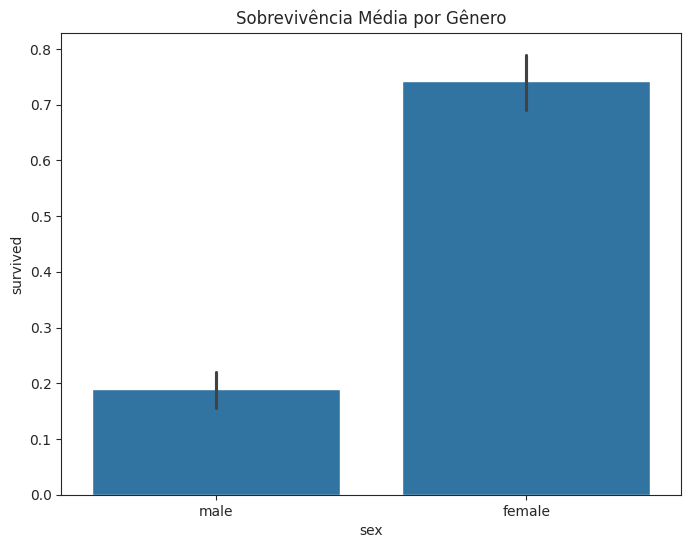

In [17]:
# 1. Barplot: Sobrevivência média por gênero
plt.figure(figsize=(8, 6))
sns.barplot(x='sex', y='survived', data=titanic)
plt.title('Sobrevivência Média por Gênero')
plt.show()

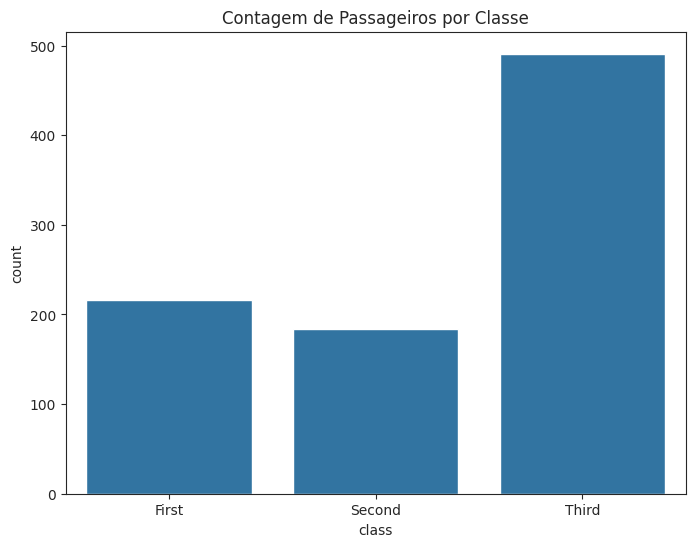

In [18]:
# 2. Countplot: Contagem de passageiros por classe
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=titanic)
plt.title('Contagem de Passageiros por Classe')
plt.show()

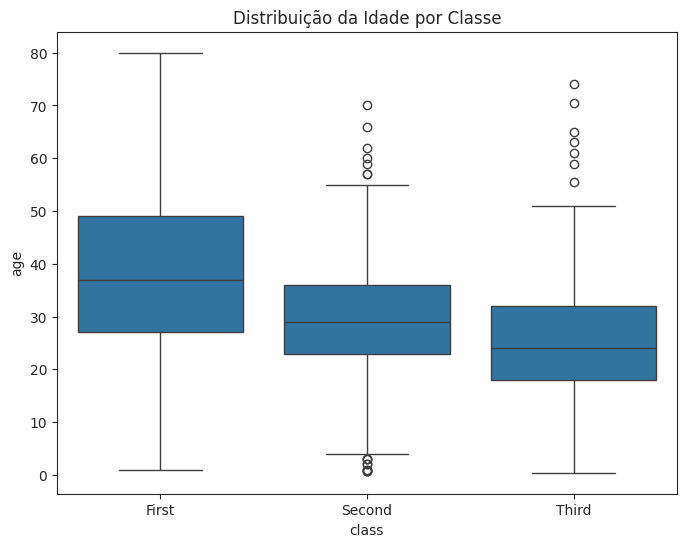

In [19]:
# 3. Boxplot: Distribuição da idade por classe
plt.figure(figsize=(8, 6))
sns.boxplot(x='class', y='age', data=titanic)
plt.title('Distribuição da Idade por Classe')
plt.show()

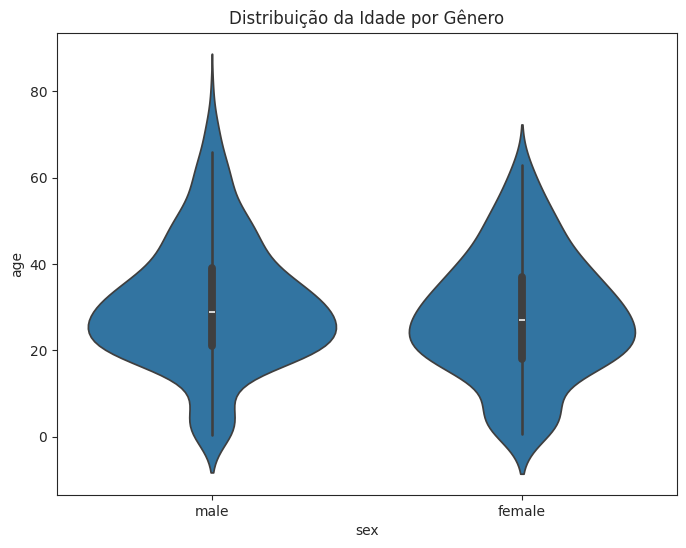

In [20]:
# 4. Violinplot: Distribuição da idade por gênero
plt.figure(figsize=(8, 6))
sns.violinplot(x='sex', y='age', data=titanic)
plt.title('Distribuição da Idade por Gênero')
plt.show()

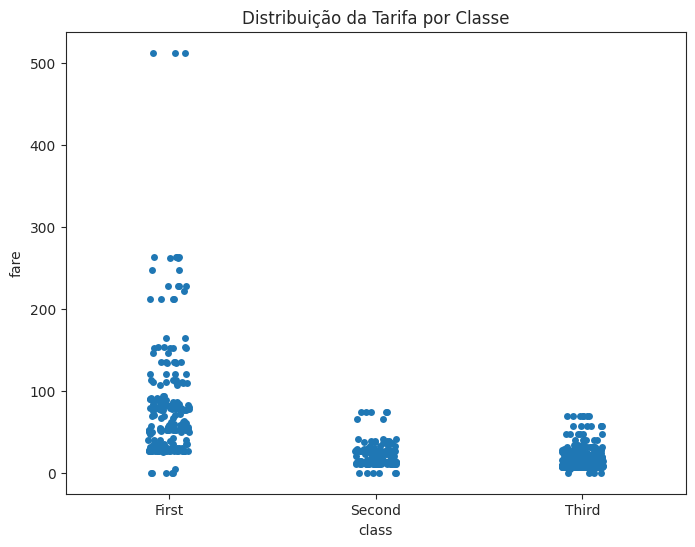

In [21]:
# 5. Stripplot: Distribuição da tarifa por classe
plt.figure(figsize=(8, 6))
sns.stripplot(x='class', y='fare', data=titanic)
plt.title('Distribuição da Tarifa por Classe')
plt.show()

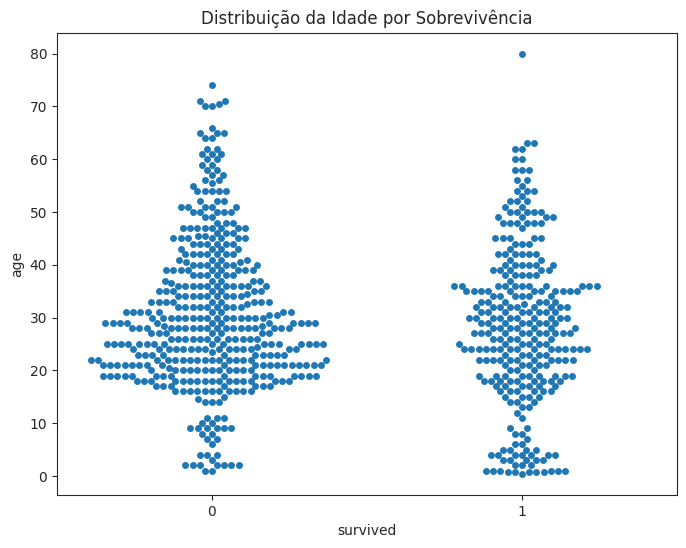

In [22]:
# 6. Swarmplot: Distribuição da idade por sobrevivência
plt.figure(figsize=(8, 6))
sns.swarmplot(x='survived', y='age', data=titanic)
plt.title('Distribuição da Idade por Sobrevivência')
plt.show()

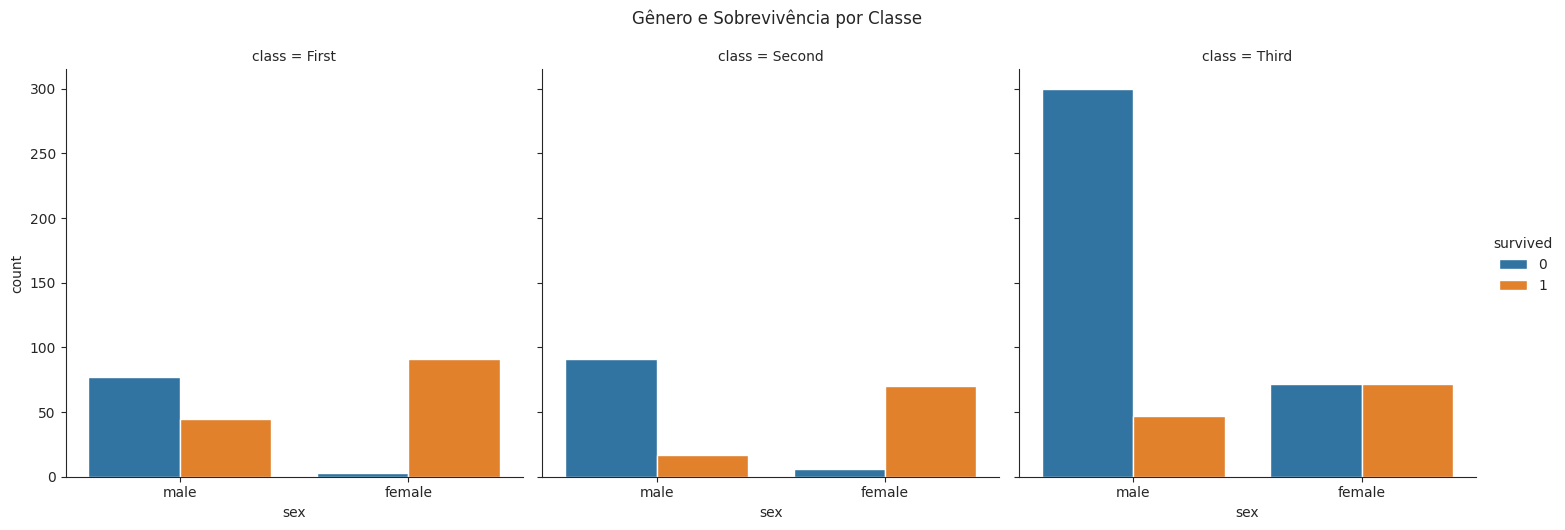

In [23]:
# 7. Catplot: Combinação de gênero e sobrevivência por classe
sns.catplot(x='sex', col='class', hue='survived', data=titanic, kind='count')
plt.suptitle('Gênero e Sobrevivência por Classe', y=1.05)
plt.show()

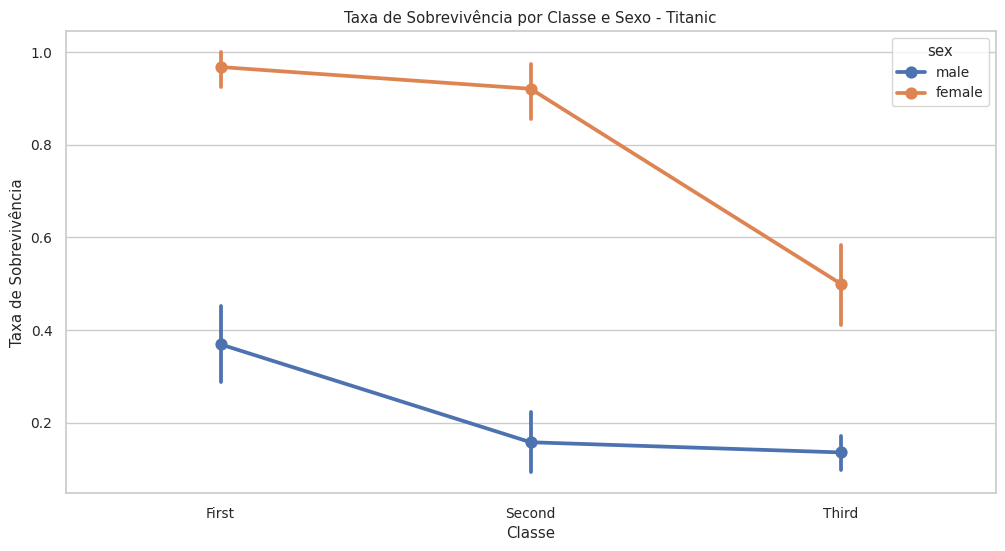

In [ ]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='class', y='survived', hue='sex', data=titanic)
plt.title('Taxa de Sobrevivência por Classe e Sexo - Titanic')
plt.ylabel('Taxa de Sobrevivência')
plt.xlabel('Classe')
plt.show()

### 4.3.4 Gráficos de Regressão

Os gráficos de regressão no Seaborn são usados para visualizar a relação entre variáveis, com foco em ajustar e exibir modelos de regressão. Eles são úteis para entender como uma variável dependente muda em relação a uma ou mais variáveis independentes.

- ```sns.regplot()```: Cria um gráfico de dispersão com uma linha de regressão ajustada aos dados. Ele mostra a relação entre duas variáveis, juntamente com um intervalo de confiança para a linha de regressão.
- ```sns.lmplot()```: Combina ```regplot()``` com a capacidade de adicionar mais variáveis categóricas através dos parâmetros ```hue```, ```col``` e ```row```. Isso permite visualizar a relação entre duas variáveis para diferentes subgrupos de dados.
- ```sns.residplot()```: Plota os resíduos (erros) de um modelo de regressão em relação aos valores da variável preditora (independente).

In [24]:
# Dados de exemplo
tips = sns.load_dataset('tips')

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


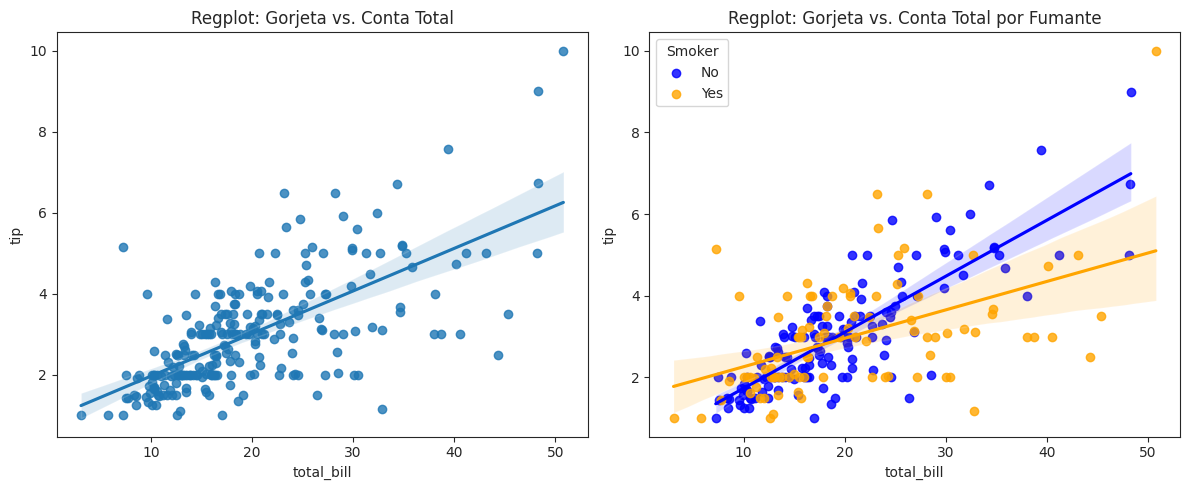

In [25]:
# Regplot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='total_bill', y='tip', data=tips)
plt.title('Regplot: Gorjeta vs. Conta Total')

# Segundo subplot (Regplot com hue manual)
plt.subplot(1, 2, 2)

# Lista de categorias para 'smoker'
hue_groups = tips['smoker'].unique()
colors = ['blue', 'orange']  # Cores para 'No' e 'Yes'

# Plota regressão para cada categoria
for i, group in enumerate(hue_groups):
    subset = tips[tips['smoker'] == group]
    sns.regplot(
        x='total_bill',
        y='tip',
        data=subset,
        color=colors[i],
        label=group
    )

plt.title('Regplot: Gorjeta vs. Conta Total por Fumante')
plt.legend(title='Smoker')

plt.tight_layout()
plt.show()

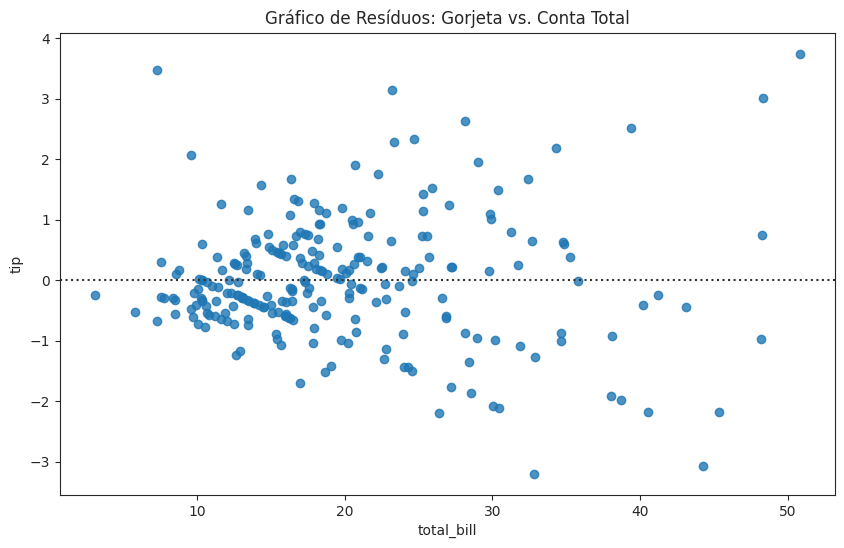

In [26]:
# Resíduos do modelo
plt.figure(figsize=(10, 6))
sns.residplot(x='total_bill', y='tip', data=tips)
plt.title('Gráfico de Resíduos: Gorjeta vs. Conta Total')
plt.show()

In [34]:
df = pd.read_csv("https://waf.cs.illinois.edu/discovery/berkeley.csv")
df

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected
...,...,...,...,...
12758,1973,Other,M,Accepted
12759,1973,D,M,Accepted
12760,1973,Other,F,Rejected
12761,1973,Other,M,Rejected


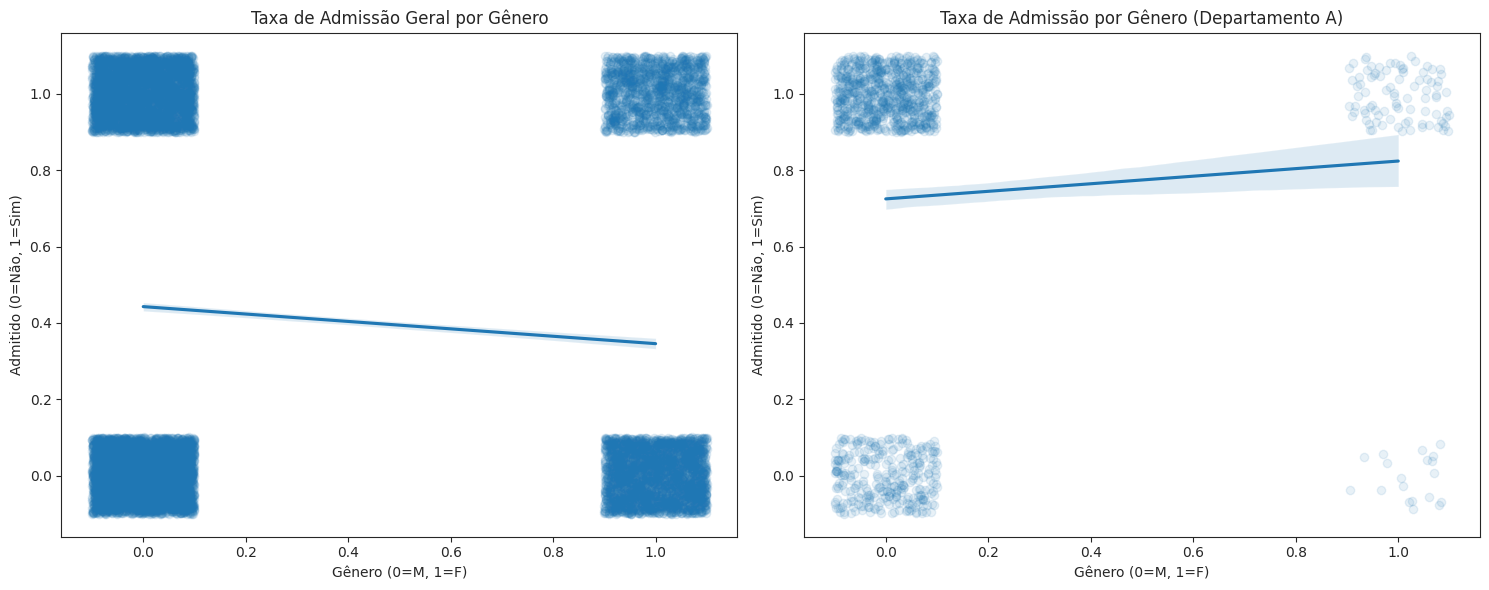


Taxas de Admissão Gerais:
Admission  Accepted  Rejected
Gender                       
F          0.345753  0.654247
M          0.442786  0.557214

Taxas de Admissão no Departamento A:
Admission  Accepted  Rejected
Gender                       
F          0.824074  0.175926
M          0.724956  0.275044


In [37]:
# Criar variáveis dummy para gênero e admissão para poder usar no regplot
df['Gender_num'] = (df['Gender'] == 'F').astype(int)
df['Admission_num'] = (df['Admission'] == 'Accepted').astype(int)

# Configurar o estilo do plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot geral (mostrando o viés aparente contra mulheres)
sns.regplot(data=df, x='Gender_num', y='Admission_num',
            x_jitter=0.1, y_jitter=0.1,
            scatter_kws={'alpha':0.1},
            ax=ax1)
ax1.set_title('Taxa de Admissão Geral por Gênero')
ax1.set_xlabel('Gênero (0=M, 1=F)')
ax1.set_ylabel('Admitido (0=Não, 1=Sim)')

# Plot por departamento (mostrando a realidade por departamento)
# Vamos usar o departamento A como exemplo
dept_A = df[df['Major'] == 'A']
sns.regplot(data=dept_A, x='Gender_num', y='Admission_num',
            x_jitter=0.1, y_jitter=0.1,
            scatter_kws={'alpha':0.1},
            ax=ax2)
ax2.set_title('Taxa de Admissão por Gênero (Departamento A)')
ax2.set_xlabel('Gênero (0=M, 1=F)')
ax2.set_ylabel('Admitido (0=Não, 1=Sim)')

plt.tight_layout()
plt.show()

# Vamos imprimir também as taxas de admissão para melhor entendimento
print("\nTaxas de Admissão Gerais:")
print(df.groupby('Gender')['Admission'].value_counts(normalize=True).unstack())

print("\nTaxas de Admissão no Departamento A:")
print(dept_A.groupby('Gender')['Admission'].value_counts(normalize=True).unstack())

### 4.3.5 Gráficos de Matriz

Esses gráficos são usados para visualizar a relação entre várias variáveis em uma matriz.

- ```sns.heatmap()```: Cria mapas de calor, que mostram a relação entre duas variáveis como cores em uma matriz.
- ```sns.clustermap()```: Cria mapas de calor com as linhas e colunas agrupadas com base na similaridade.
- ```sns.pairplot()```: Cria uma matriz de gráficos de dispersão, mostrando a relação entre todos os pares de variáveis em um conjunto de dados.
- ```sns.JointGrid()```: Cria um gráfico de dispersão com histogramas marginais, mostrando a distribuição de cada variável individualmente e a relação entre elas.

### 4.3.5 FacetGrid: Múltiplos Gráficos por Categoria

FacetGrid permite criar múltiplos gráficos separados por categorias:

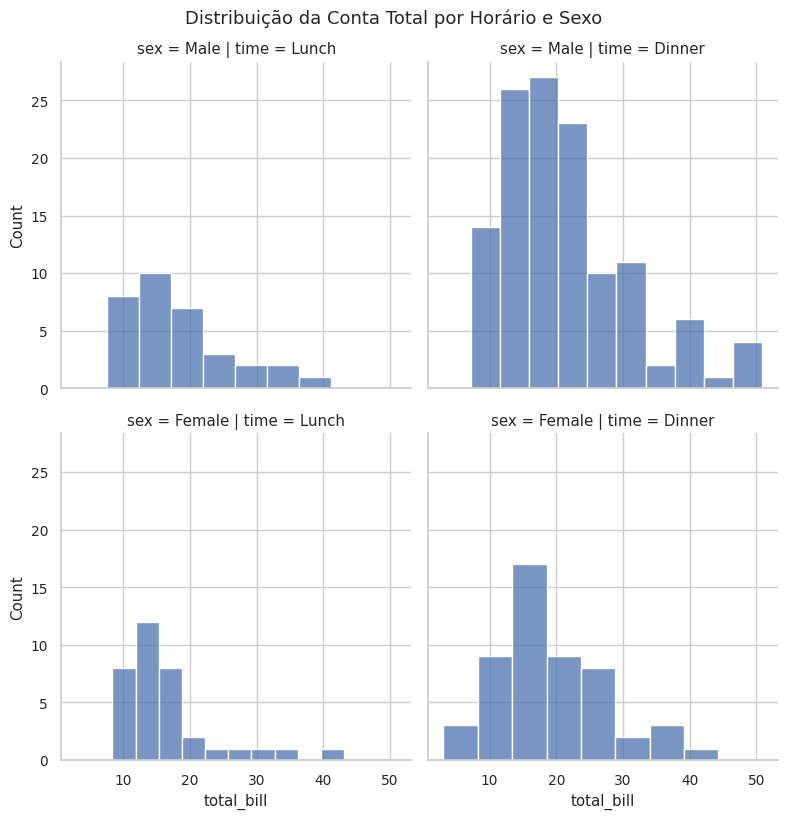

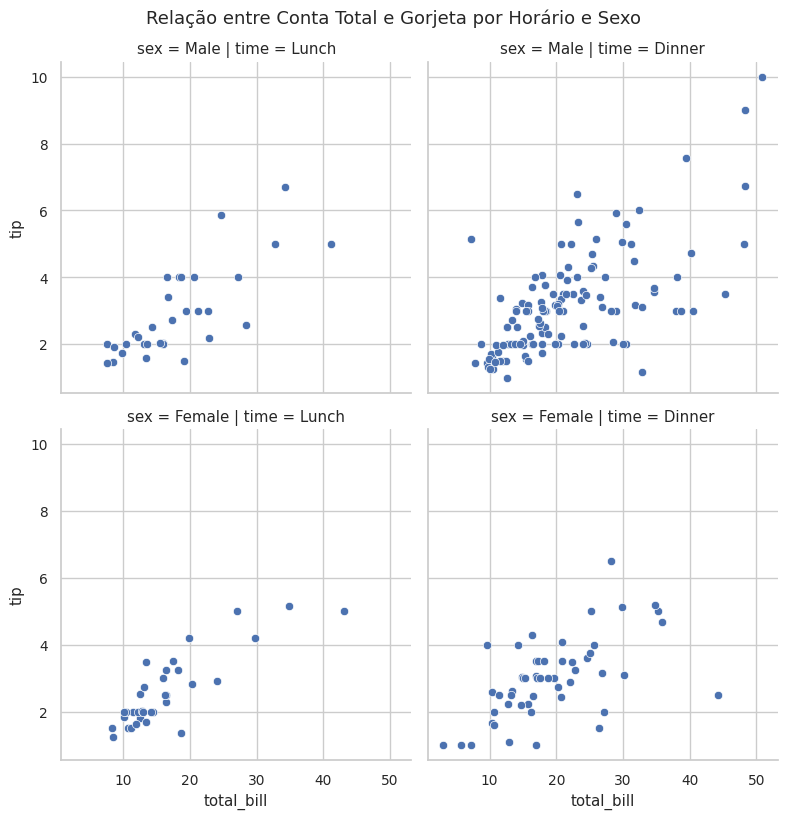

In [ ]:
# FacetGrid com histogramas
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map(sns.histplot, "total_bill")
plt.suptitle('Distribuição da Conta Total por Horário e Sexo', y=1.02)
plt.show()

# FacetGrid com scatterplots
g = sns.FacetGrid(tips, col="time", row="sex", height=4)
g.map(sns.scatterplot, "total_bill", "tip")
plt.suptitle('Relação entre Conta Total e Gorjeta por Horário e Sexo', y=1.02)
plt.show()

### 4.3.6 Personalização de Gráficos no Seaborn

Seaborn permite personalizar gráficos de várias maneiras:

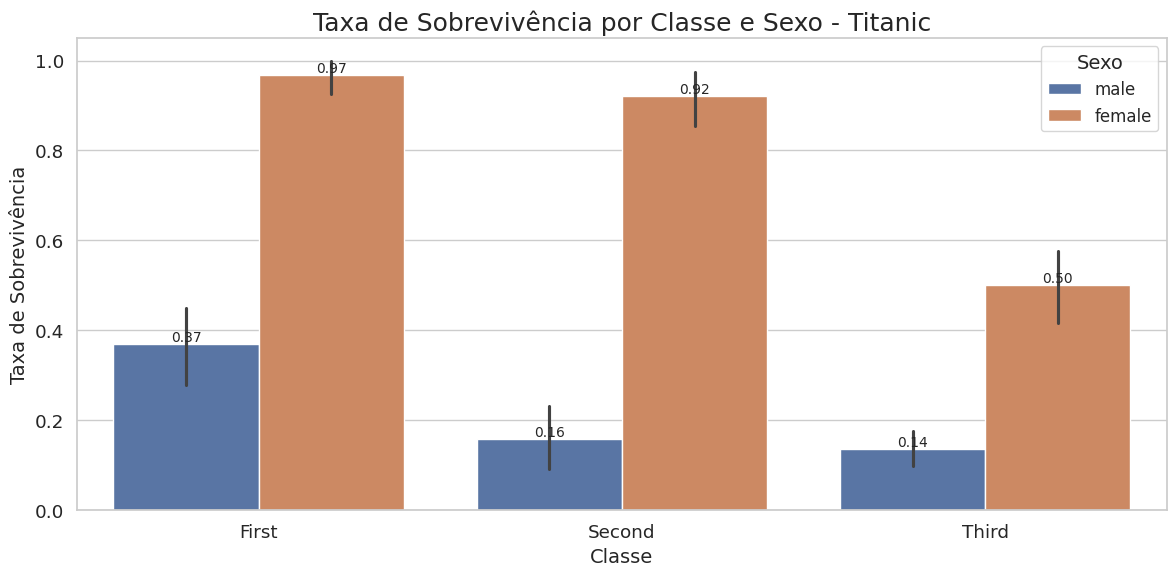

In [ ]:
# Configurar o estilo
sns.set_theme(style="whitegrid", palette="deep", font_scale=1.2)

# Criar um gráfico personalizado
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='class', y='survived', hue='sex', data=titanic)

# Personalizar o gráfico
ax.set_title('Taxa de Sobrevivência por Classe e Sexo - Titanic', fontsize=18)
ax.set_xlabel('Classe', fontsize=14)
ax.set_ylabel('Taxa de Sobrevivência', fontsize=14)
ax.legend(title='Sexo', fontsize=12, title_fontsize=14)

# Adicionar valores nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', fontsize=10)

plt.tight_layout()
plt.show()

## 4.4 Conclusão

Seaborn é uma poderosa biblioteca de visualização que simplifica a criação de gráficos estatísticos atraentes. Ela se baseia no Matplotlib, mas oferece uma interface mais amigável e resultados visualmente mais agradáveis por padrão.

Nos próximos capítulos, exploraremos os conjuntos de dados embutidos no Seaborn e como aplicar diferentes tipos de gráficos para análise de dados demográficos.